This is comprehensive tutorial about Natural Language Processing for beginners and intermediate level users. The tutorial spans across 3 parts.
[Part-1](https://www.kaggle.com/kksienc/comprehensive-nlp-tutorial-1-ml-perspective/) discusses NLP with respect to traditional Machine Learning perspective. 
[Part 2](https://www.kaggle.com/kksienc/comprehensive-nlp-tutorial-2-dl-perspective) explains NLP with respect to Deep Learning perspective and 
[Part-3](https://www.kaggle.com/kksienc/comprehensive-nlp-tutorial-3-bert) demonstrates useful NLP state-of-art BERT embedding. I will be using [Disaster Tweets](https://www.kaggle.com/c/nlp-getting-started) dataset for our text modeling. 

<a class="kk" id="0.1"></a>
## Contents

1. [NLP Introduction](#1)
1. [Text Cleaning](#2)
    1. [Text Standardization](#2.1)
        1. [Convert to Lower Case](#2.1.1)
        1. [Spelling Correction](#2.1.2)    
    1.  [Eliminate Undesirable Items From Text](#2.2)
         1. [Removing Additional Spaces](#2.2.1)
         1. [Removing Punctuations](#2.2.2)
         1. [Removing URLs](#2.2.3)
         1. [Removing Digits](#2.2.4)
         1. [Removing Stopwords](#2.2.5) 
    1. [Convert Non-Words to Words](#2.3)
        1. [Convert Emoji Into Words](#2.3.1)  
    1. [Convert Negative Word to its Antonyms](#2.4)
    1. [Dealing With Base and Derived Words](#2.5)
         1. [Stemming](#2.5.1)
         1. [Lemmatization](#2.5.2)
    1. [Extract Text Using BeautifulSoup](#2.6)    
1. [Text to Numeric Conversion](#3)
    1. [Pre Conversion](#3.1)
        1. [Corpus](#3.1.1)
        1. [Tokenization](#3.1.2)
        1. [Bag of Words](#3.1.3)
        1. [N-Gram](#3.1.4)
    1.  [Conversion](#3.2)
         1. [Count Vectorization](#3.2.1)
         1. [TF-IDF Vectorization](#3.2.2)    
    1. [Post Conversion Dimesionality Reduction](#3.3)
        1. [SVD(TruncatedSVD)](#3.3.1)         
1. [ML-Modeling](#4)
    1. [Naive Bayes Classifer](#4.1)
        1. [Gaussian Classifier](#4.1.1)
        1. [Bernoulli  Classifier](#4.1.2)
    1. [Logistic Regression](#4.2)
    1. [SVM](#4.3)
    1. [XGBoost](#4.4)

## 1. NLP Introduction <a class="kk" id="1"></a>
[Back to Contents](#0.1)

Natural Language processing enables computer to understand and process human languages which include both text and audio. In this tutorial we will look into text processing.  

pre-requsite:  Python and its libraries.
 

## 2. Text Cleaning <a class="kk" id="2"></a>

[Back to Contents](#0.1)

Primary step of any Machine-Learning project is data cleaning. In text processing also, first we need to clean and standardise text. Lets look into some of the ways of cleaning textual data.

### 2.1. Text Standardization <a class="kk" id="2.1"></a>



#### 2.1.1. Convert to Lower Case <a class="kk" id="2.1.1"></a>

Words with different cases are intercepted differently such as 'The' and 'the'. Hence all words should be converted into same case, preferably lower case.

In [1]:
text ="Welcome to NLP Tutorial"
text = text.lower()
print(text)

welcome to nlp tutorial


#### 2.1.2 Spelling Correction <a class="kk" id="2.1.2"></a>

At times textual data such as social media data is prone to spelling errors. Spelling errors should be rectified early during the clean-up phase. Fortunately we have libraries available for spelling correction.

In [2]:
!pip install pyspellchecker

     ---------------------------------------- 2.5/2.5 MB 842.4 kB/s eta 0:00:00


Error processing line 3 of C:\Users\AMANT\anaconda3\lib\site-packages\googleapis_common_protos-1.56.4-py3.10-nspkg.pth:

  Traceback (most recent call last):
    File "C:\Users\AMANT\anaconda3\lib\site.py", line 169, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 562, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored


In [3]:
from spellchecker import SpellChecker
def correct_spellings(text):
    spell = SpellChecker()
    corrected_words = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_words.append(spell.correction(word))
        else:
            corrected_words.append(word)
    return " ".join(corrected_words)
        


text = "Spelling correctin is proprly perfrmed"
text = correct_spellings(text)
print(text)

Spelling correcting is properly performed


### 2.2 Eliminate Undesirable Items From Text <a class="kk" id="2.2"></a>

Texts contains many items that are not useful with respect to text processing and it is better to eliminate them before modelling. Lets look into items that should be considered for removal and repective codes to remove them.

#### 2.2.1  Removing Additional Spaces <a class="kk" id="2.2.1"></a>

In [4]:
import re
text = "Correcting   double  space  text "
text = re.sub(' +', ' ', text)
print(text)

Correcting double space text 


#### 2.2.2. Removing Punctuations <a class="kk" id="2.2.2"></a>

In [5]:
import string

text = "This! sentence, contains so: many - punctuations."
text = text.translate(str.maketrans('', '', string.punctuation))
print(text)

This sentence contains so many  punctuations


#### 2.2.3. Removing URLs  <a class="kk" id="2.2.3"></a>

In [6]:
text = 'Shall I search the answer in www.google.com ?'
text  = re.sub(r"https?://\S+|www\.\S+", "", text )
print(text)

Shall I search the answer in  ?


#### 2.2.4.  Removing Digits <a class="kk" id="2.2.4"></a>

In [7]:
text ="Being no 1 team is more important or being no 3 but with fair play "
text= re.sub(r'[0-9]','',text)
print (text)

Being no  team is more important or being no  but with fair play 


#### 2.2.5. Removing Stopwords  <a class="kk" id="2.2.5"></a>

Stopwords are the most common words in a language. For example 'is', 'the', 'that' etc. are stopwords in English language. Stopwords shall be removed during text clean-up phase. However removing stop word can change the meaning of sentence. For instance 'I didn't love politics' will get converted to 'I love politics' after removing stopword.  

In [8]:
from nltk.corpus import stopwords 

text = "This is not the most important topic"

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    # stop_words will contain  set all english stopwords
    filtered_sentence = []   
    for word in text.split(): 
        if word not in stop_words: 
            filtered_sentence.append(word) 
    return " ".join(filtered_sentence)

text = remove_stopwords(text)
print(text) 
 


This important topic


### 2.3 Convert Non-Words to Words <a class="kk" id="2.3"></a>

Special symbols such as emoticon, emojis etc. are example of non-words.  These non-words should be either converted into words or removed from text. Emoji library converts emojis to equivalent words as shown below. 

#### 2.3.1 Convert Emoji Into Words  <a class="kk" id="2.3.1"></a>

In [9]:
import emoji
text = 'Python is 👍'
print(emoji.demojize(text))

Python is :thumbs_up:


### 2.4 Convert Negative Word to its Antonyms <a class="kk" id="2.4"></a>

Negative words should be replaced with their antonym for efficient processing. For instance 'not good’ should be replaced with bad.

In [10]:
text = "He was not happy with the score of team"
from nltk.corpus import wordnet
import nltk

def convert_to_antonym(sentence):
    words = nltk.word_tokenize(sentence)
    new_words = []
    temp_word = ''
    for word in words:
        antonyms = []
        if word == 'not':
            temp_word = 'not_'
        elif temp_word == 'not_':
            for syn in wordnet.synsets(word):
                for s in syn.lemmas():
                    for a in s.antonyms():
                        antonyms.append(a.name())
            if len(antonyms) >= 1:
                word = antonyms[0]
            else:
                word = temp_word + word # when antonym is not found, it will
                                    # remain not_happy
            
            temp_word = ''
        if word != 'not':
            new_words.append(word)
    return ' '.join(new_words)
    
text = convert_to_antonym(text)
print(text)   

He was unhappy with the score of team


### 2.5 Dealing With Base and Derived Words <a class="kk" id="2.5"></a>

Words can be classified into Base word and Derived word. For example 'go' is a base word and  'going', 'gone' and 'went' are its derived words. During data cleaning phase derived word shall be converted to their base counterparts. There are two ways of finding base word of any word - Stemming and Lemmatization.


#### 2.5.1 Stemming  <a class="kk" id="2.5.1"></a>

Stemming is a rule base technique. In Stemming Base word is identified by chopping the word at end. For instance 'going' and 'gone' will get converted to 'go' but 'went' will not.

In [11]:
from nltk.stem.porter import PorterStemmer
text = " David wanted to go with Alfa but Alfa went with Charli so David is going with Bravo"
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

text = stem_words(text)
print(text)

david want to go with alfa but alfa went with charli so david is go with bravo


#### 2.5.2 Lemmatization   <a class="kk" id="2.5.2"></a>
Lemmatization is a dictionary based technique and more accurate than stemming. It looks up to the dictionary to fetch Base word (called as lemma). The obvious downside is, it is slow in processing because has to store and look up the dictionary.

Additionally, lemmatization requires Parts of speech tagging. Lets understand POS tagging first.

####  Parts of Speech (POS) tagging 

Parts of Speech Tagger processes a sequence of words and attaches a part of speech tag to each word. 'nltks poc_tag' library is used for POS tagging. Some POS tags examples are VBZ -> Verb, NN-> Noun, PRP -> preposition, IN -> Interjection.


In [12]:
import nltk
text = "This is very good observation by you."
nltk.pos_tag(text.split()) 


[('This', 'DT'),
 ('is', 'VBZ'),
 ('very', 'RB'),
 ('good', 'JJ'),
 ('observation', 'NN'),
 ('by', 'IN'),
 ('you.', 'NN')]

If you want to know what exactly each tag specify use nltk help function as below

In [13]:
import nltk
nltk.download('tagsets')
nltk.help.upenn_tagset('DT')

[nltk_data] Downloading package tagsets to /usr/share/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those


Now coming back to Lemmatization,we need to define a wordnet_map (as in below code) and specify for which all parts of speech we need to find Base words otherwise by default it will fetch base words for nouns only.  

In [14]:
# import these modules 
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer 
import nltk 
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV }

# without wordnet map it takes evey word as noun
text = "David wanted to go with Alfa but Alfa went with Charli so David is going with Bravo "
 
def lemma_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word ,wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])


lemma_words(text) 


'David want to go with Alfa but Alfa go with Charli so David be go with Bravo'

### 2.6 Extract Text Using BeautifulSoup <a class="kk" id="2.6"></a>
Beautiful Soup is a very useful Python library used for extracting text data from HTML and XML files.

In [15]:
text = """
<html><head><title>The NLP story</title></head>
<body>
<p class="title"><b>The NLP story</b></p>
<p class="story">Once upon a time there were three little  techniques; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived till the next conference.</p>
<p class="story">...</p>
"""

print(text)


<html><head><title>The NLP story</title></head>
<body>
<p class="title"><b>The NLP story</b></p>
<p class="story">Once upon a time there were three little  techniques; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived till the next conference.</p>
<p class="story">...</p>



In [16]:
from bs4 import BeautifulSoup
text = BeautifulSoup(text, "html").text# for HTML decoding
# for lxml  decoding use as below
#text = BeautifulSoup(text, "lxml").text
print(text)

The NLP story

The NLP story
Once upon a time there were three little  techniques; and their names were
Elsie,
Lacie and
Tillie;
and they lived till the next conference.
...



Now, as we know possible ways to clean our text data we will write a clean-up function for our Disaster Tweets dataset.
Note that: choice of clean up approaches mainly depend upon problem domain, dataset and individual perception. For instance, for newspaper and journal articles we might not need any spelling correction. Clean-up function is an important factor in deciding overall classification outcome.

In [17]:
def clean_text(text):
    """
        text: a string
        
        return: modified initial string
  """
    text = text.lower() # lowercase text
    text= re.sub(r'[^\w\s#]',' ',text) #Removing every thing other than space, word and hash
    text  = re.sub(r"https?://\S+|www\.\S+", "", text )
    text= re.sub(r'[0-9]',' ',text)
    #text = correct_spellings(text)
    text = convert_to_antonym(text)
    text = re.sub(' +', ' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text    
    return text

In [18]:
import numpy as np  
import pandas as pd 
train_df = pd.read_csv("../input/nlp-getting-started/train.csv")
test_df = pd.read_csv("../input/nlp-getting-started/test.csv")

## 3. Text to Numeric Conversion <a class="kk" id="3"></a>

[Back to Contents](#0.1) 

Once text is cleaned we need to feed it into learning Algorithm. However, Learning algorithms understand numbers and not words hence, we will convert text into numbers before feeding into any modeling algorithm. 

 

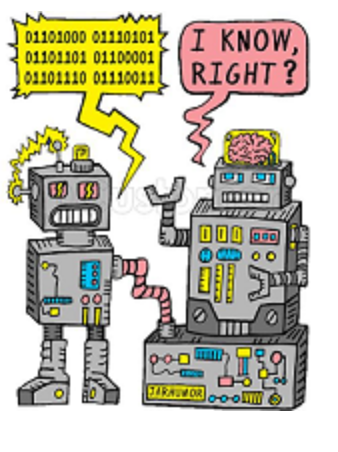

In [19]:
from IPython.display import Image
Image("/kaggle/input/images/texttonumber.jpg",  width=400)

### 3.1 Pre Conversion <a class="kk" id="3.1"></a>

Before performing text to numeric conversion we will look into few common NLP vocabulary terms.

#### 3.1.1 Corpus <a class="kk" id="3.1.1"></a>
Collection of all available textual data is known as corpus.

In [20]:
corpus= pd.DataFrame(columns=['text'])
corpus['text']= pd.concat([train_df["text"], test_df["text"]])

#### 3.1.2 Tokenization<a class="kk" id="3.1.2"></a>

Text is segmented into its smaller parts called tokens. This segmentation process is known as tokenization. A common example of tokens we can think of is words. However tokens can be something else also such as combination of 2 words. 
 

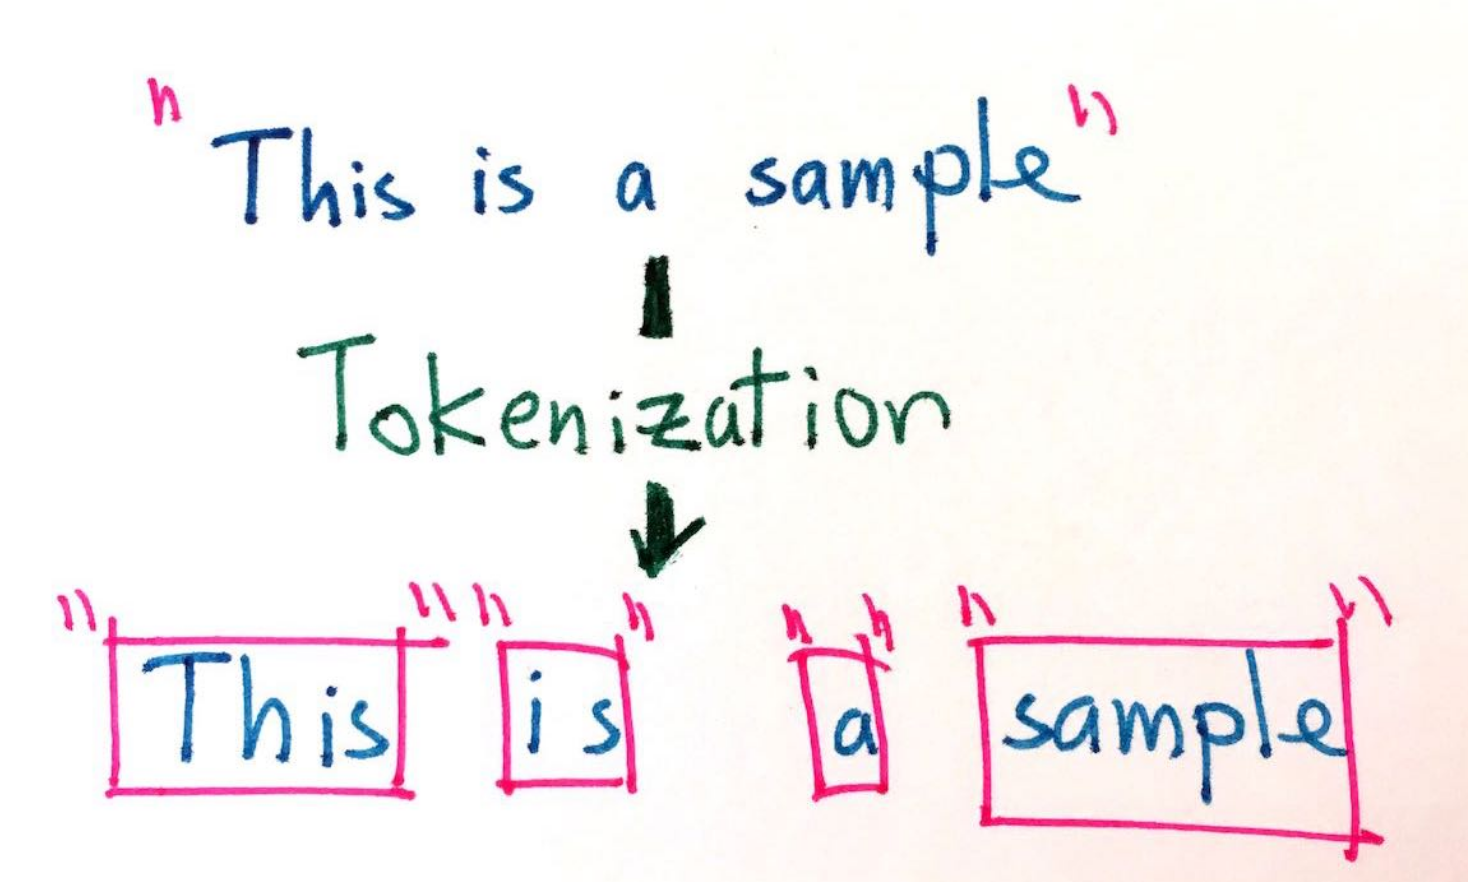

In [21]:
from IPython.display import Image
Image("/kaggle/input/images/tokenization.png",  width=400)


#### 3.1.3 Bag of Words (BOW) <a class="kk" id="3.1.3"></a>

BOW approach is a way of representing text data. BOW approach recognizes text as just a bag of words and keeps a count of the total occurrences of words in text. It does not consider meaning or context of the word in the document. For example,

Text -> "Now tell me BOW approach is good or not so good?"

BOW -> "Now","tell","me","BOW","approach",is","good","or","not","so","good"


### 3.1.4 N-Gram <a class="kk" id="3.1.4"></a>

N-grams is a contiguous sequence of n words from a given sample of source text. For Example: 


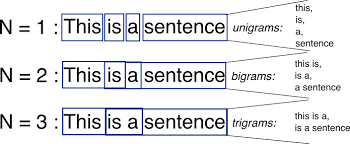

In [22]:
from IPython.display import Image
Image("/kaggle/input/images/ngram.png",  width=400)

## 3.2 Conversion <a class="kk" id="3.2"></a>
In this section we will look into text to numerical conversion techniques.

### 3.2.1 CountVectorization  <a class="kk" id="3.2.1"></a>

CountVectorization converts a collection of text documents to a matrix of token counts. It counts the tokens in text.  Total no of tokens i.e. vocabulary size will equal to matrix column length (no of columns) where each column represents a token. A row array represents unique tokens of the record and the number at a cell will indicate count of that token in the record.
 

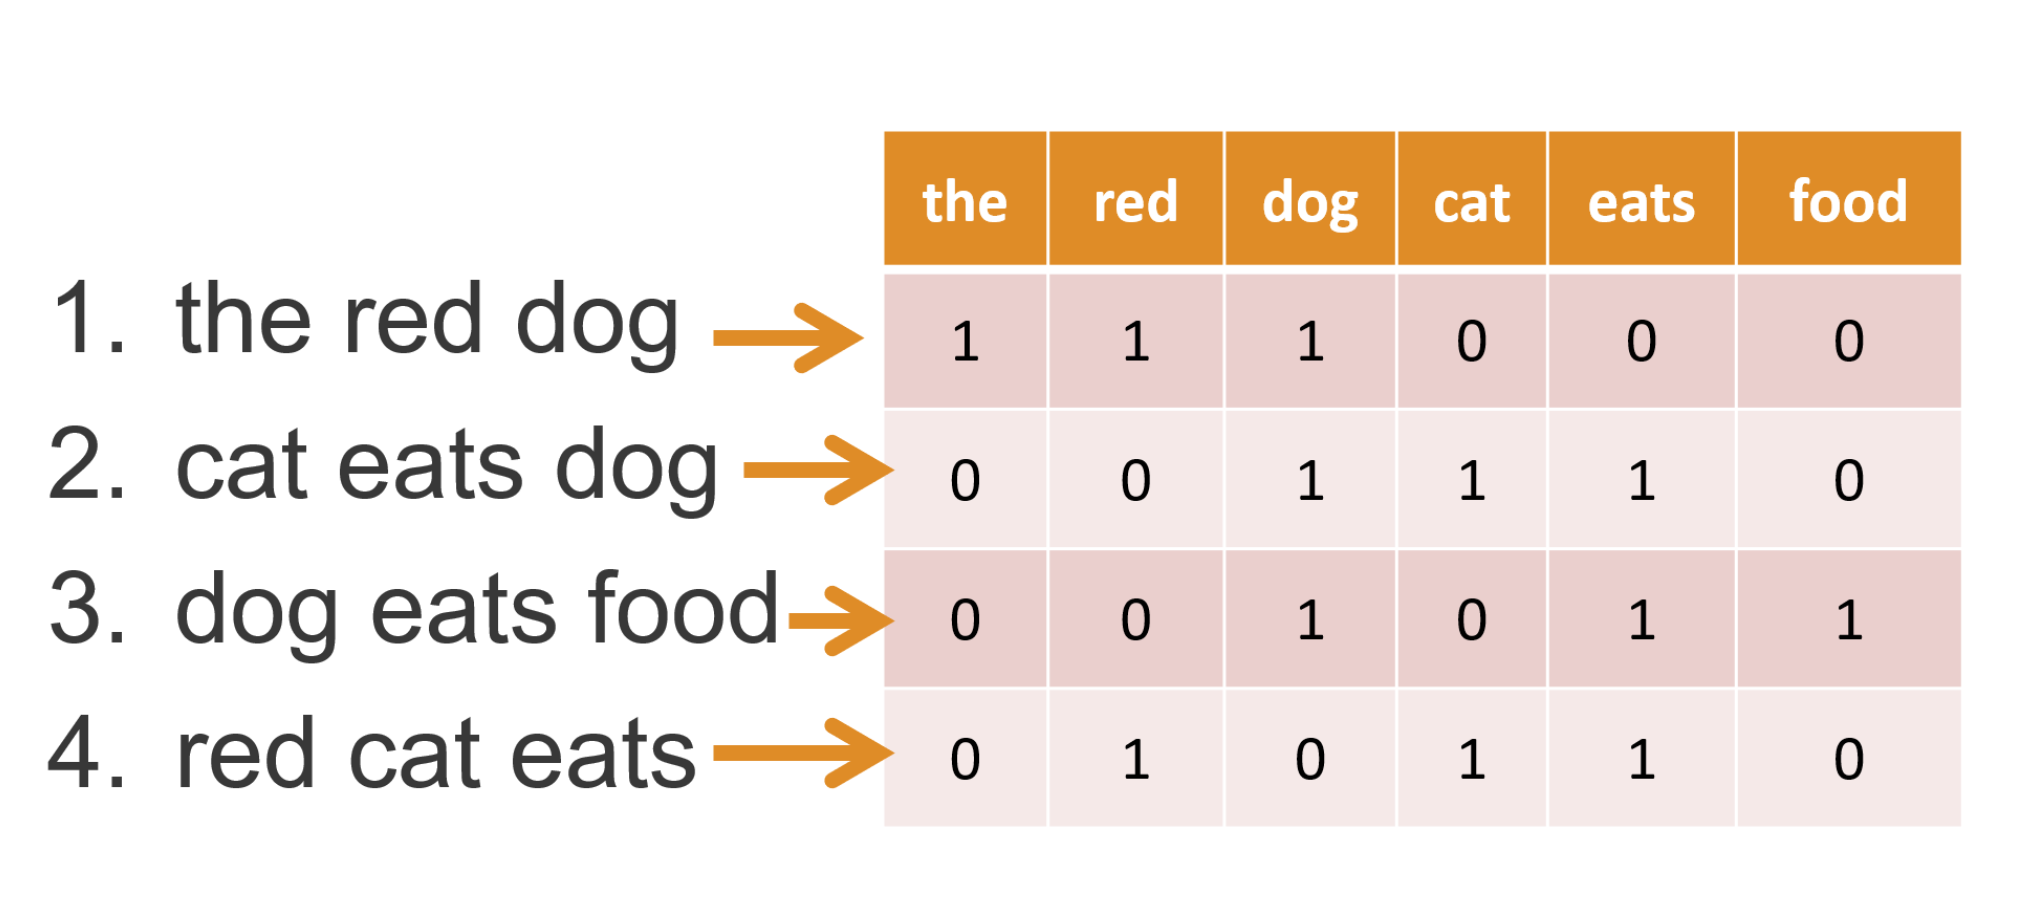

In [23]:
Image("/kaggle/input/images/countvectorization.png",  width=400)

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(analyzer='word', ngram_range=(1, 1))
# analyzer should be word/ character
#ngram_range lower and upper boundary of the range of n-values

## let'sconvert text to vectors
train_countvectors = count_vectorizer.fit_transform(train_df["text"])

# generating test CountVectorizer matrix
test_countvectors = count_vectorizer.transform(test_df["text"])


In [25]:
# converting sparce to dense vector 
print(train_countvectors.shape)
print(train_countvectors[0])
print(train_countvectors[0].todense())

(7613, 21637)
  (0, 14003)	1
  (0, 5490)	1
  (0, 2192)	1
  (0, 18669)	1
  (0, 15678)	1
  (0, 13681)	1
  (0, 18777)	1
  (0, 6379)	1
  (0, 12141)	1
  (0, 1852)	1
  (0, 7661)	1
  (0, 19774)	1
  (0, 1851)	1
[[0 0 0 ... 0 0 0]]


### 3.2.2 TF-IDF Vectorization <a class="kk" id="3.2.2"></a>

TF-IDF stands for 'Term frequency-inverse document frequency'. It measures importance of a token (called as term) with respect to its record (called as document) in a corpus. Every term of a document is assigned a weight after multiplying its term frequency (tf) and inverse document frequency (idf). Internally, different libraries use slightly different formula to calculate 'idf' value though underlying idea remains same.

 


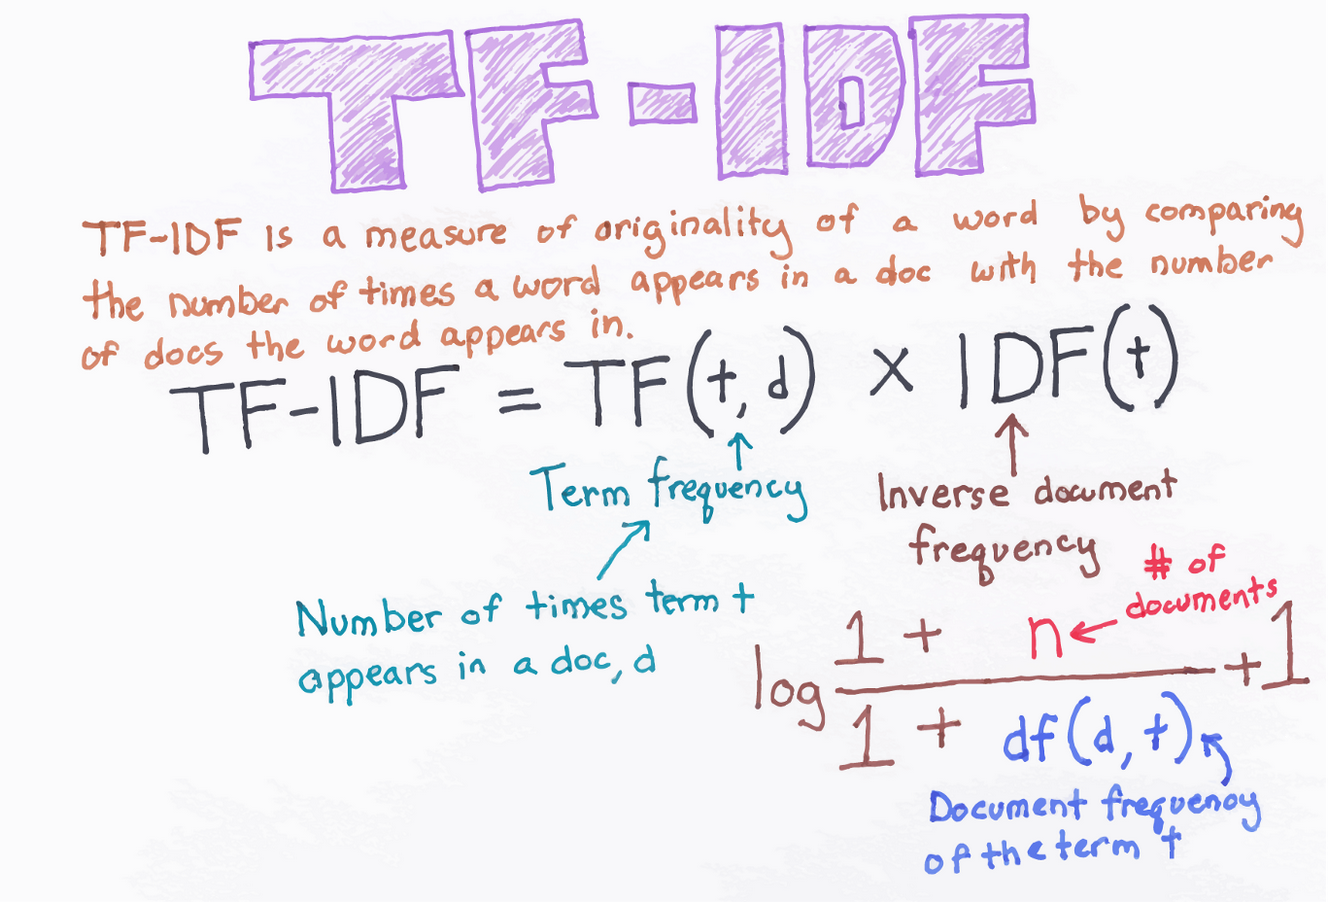

In [26]:
Image("/kaggle/input/images/tfidf.png",  width=450)

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(analyzer='word',stop_words='english', ngram_range=(1, 1))
# training tfidf on corpus
tfidf_vectorizer.fit(corpus['text'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [28]:
train_tfidfvectors = tfidf_vectorizer.transform(train_df['text'])
test_tfidfvectors = tfidf_vectorizer.transform(test_df['text'])

print(train_tfidfvectors.shape)
print(test_tfidfvectors.shape)
print(train_tfidfvectors.todense().shape)
print(train_tfidfvectors[0].todense())

(7613, 27641)
(3263, 27641)
(7613, 27641)
[[0. 0. 0. ... 0. 0. 0.]]


### 3.3 Post Conversion <a class="kk" id="3.3"></a>

Both Countvectorization and tf-idf technique produce large size matrix. Post text-to-numerical conversion dimensionality reduction techniques can be tried out to reduce matrix size though keeping their relative importance intact.

#### 3.3.1 SVD ( TruncatedSVD)   <a class="kk" id="3.3.1"></a>

TruncatedSVD transformer performs linear dimensionality reduction by means of truncated Singular Value Decomposition (SVD). It efficiently works on sparse matrices. 

In [29]:
train_countvectors.shape

(7613, 21637)

In [30]:
from sklearn.decomposition import TruncatedSVD   
tsv = TruncatedSVD(n_components=100)
train_countvectors_svd = tsv.fit_transform(train_countvectors) 
train_tfidfvectors_svd = tsv.fit_transform(train_tfidfvectors)


In [31]:
print(train_countvectors_svd.shape)
print(train_tfidfvectors_svd.shape)

(7613, 100)
(7613, 100)


## 4. ML Modeling <a class="kk" id="4"></a>
[Back to Contents](#0.1)

As our text data is in numerical form, it is ready to feed into ML Algorithm. Now we will train classifier models on our numerical data. Purpose here is to depict basic model performance and not to obtain high score.

In [32]:

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# base function to train and compare various models performance
from sklearn import model_selection
def text_modeling( model):
    print( "Model :"+ str(model))
    print('***** F1 Scores *******')
    scores=model_selection.cross_val_score(model, train_countvectors.toarray(), train_df["target"], cv=3, scoring="f1")
    print("CountVectorized dataset :"+str(scores.mean()))
    scores= model_selection.cross_val_score(model, train_tfidfvectors.toarray(), train_df["target"], cv=3, scoring="f1")
    print("TF-IDF Vectorized dataset :"+str(scores.mean()))
    scores = model_selection.cross_val_score(model, train_tfidfvectors_svd, train_df["target"], cv=3, scoring="f1")
    print("TF-IDF Vectorized + SVD dataset "+str(scores.mean()))
    scores = model_selection.cross_val_score(model, train_countvectors_svd, train_df["target"], cv=3, scoring="f1")
    print("CountVectorized + SVD dataset "+str(scores.mean()))


### 4.1 Naive Bayes Classifer <a class="kk" id="4.1"></a>


#### 4.1.1 Gaussian Classifier <a class="kk" id="4.1.1"></a>

In [33]:
from sklearn.naive_bayes import GaussianNB
gn = GaussianNB()
text_modeling(gn)

Model :GaussianNB(priors=None, var_smoothing=1e-09)
***** F1 Scores *******
CountVectorized dataset :0.6060410425793524
TF-IDF Vectorized dataset :0.5893905433391442
TF-IDF Vectorized + SVD dataset 0.4496514440772539
CountVectorized + SVD dataset 0.5300257277051384


#### 4.1.2 Bernoulli  Classifier <a class="kk" id="4.1.2"></a>

In [34]:
from sklearn.naive_bayes import BernoulliNB
#Create a Gaussian Classifier
 
br = BernoulliNB()
text_modeling( br)

Model :BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
***** F1 Scores *******
CountVectorized dataset :0.6748069579702234
TF-IDF Vectorized dataset :0.6187771501248447
TF-IDF Vectorized + SVD dataset 0.5760518832897698
CountVectorized + SVD dataset 0.526101814461995


### 4.2 Logistic Regression <a class="kk" id="4.2"></a>

In [35]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')
text_modeling( lr)

Model :LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
***** F1 Scores *******
CountVectorized dataset :0.6462951211992708
TF-IDF Vectorized dataset :0.569332520580874
TF-IDF Vectorized + SVD dataset 0.5629955003777055
CountVectorized + SVD dataset 0.6113929070321577


### 4.3 Support Vector Machine <a class="kk" id="4.3"></a>

In [36]:
 from sklearn.svm import SVC
svm = SVC()
# text_modeling(svm)
model_selection.cross_val_score(svm, train_tfidfvectors_svd, train_df["target"], cv=3, scoring="f1").mean()

0.6249617810577258

### 4.4 XGBoost <a class="kk" id="4.4"></a>

In [37]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier()
# text_modeling(xgb_clf)
model_selection.cross_val_score(xgb_clf, train_tfidfvectors_svd, train_df["target"], cv=3, scoring="f1").mean()

0.6315868318189074

Thanks for reading. In this part we saw various ways to clean text data and convert text into numerical representations so that text shall be processed by Machine learning algorithms.  


In the next [part](https://www.kaggle.com/kksienc/comprehensive-nlp-tutorial-2-dl-perspective) we will see how to take care of synonyms and language specific aspects while doing numeric conversion.We will learn about one of the important concepts of NLP that is 'Word Embeddings' and see how Deep Learning has simplified NLP. 

If you found this notebook usefull Please Upvote!
